# Introduction to Autoencoders

An autoencoder is a neural network that is trained to copy its input to its output, with the typical purpose of dimension reduction - the process of reducing the number of random variables under consideration. It features an encoder function to create a hidden layer (or multiple layers) which contains a code to describe the input. There is then a decoder which creates a reconstruction of the input from the hidden layer.

# Introduction to MNIST (handwritten digit database)

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

# Import requied packages 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Load the MNIST

In [2]:
mnist = input_data.read_data_sets("/tmp/MNIST_data/",one_hot=True)

Extracting /tmp/MNIST_data/train-images-idx3-ubyte.gz
Extracting /tmp/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /tmp/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/MNIST_data/t10k-labels-idx1-ubyte.gz


# CAE (Convolutional AutoEncoder) Architecture

In [0]:
X = tf.placeholder(tf.float32, shape=[None, 784])
Xi = tf.reshape(X, [-1, 28, 28, 1])

In [0]:
x = tf.layers.conv2d(Xi, filters=16, kernel_size=(3, 3), activation=tf.nn.relu, padding='SAME')
x = tf.layers.max_pooling2d(x, pool_size=(2, 2), strides=(2, 2), padding='SAME')

x = tf.layers.conv2d(x, filters=8, kernel_size=(3, 3), activation=tf.nn.relu, padding='SAME')
x = tf.layers.max_pooling2d(x, pool_size=(2, 2), strides=(2, 2), padding='SAME')

x = tf.layers.conv2d(x, filters=8, kernel_size=(3, 3), activation=tf.nn.relu, padding='SAME')
encoded = tf.layers.max_pooling2d(x, pool_size=(2, 2), strides=(2, 2), padding='SAME')

In [0]:
x = tf.layers.conv2d(encoded, filters=8, kernel_size=(3, 3), activation=tf.nn.relu, padding='SAME')
x = tf.layers.conv2d_transpose(x, filters=8, kernel_size=(2, 2), strides=(2, 2))

x = tf.layers.conv2d(x, filters=8, kernel_size=(3, 3), activation=tf.nn.relu, padding='SAME')
x = tf.layers.conv2d_transpose(x, filters=8, kernel_size=(2, 2), strides=(2, 2))

x = tf.layers.conv2d(x, filters=16, kernel_size=(3, 3), activation=tf.nn.relu)
x = tf.layers.conv2d_transpose(x, filters=16, kernel_size=(2, 2), strides=(2, 2))

decoded = tf.layers.conv2d(x, filters=1, kernel_size=(3, 3), activation=tf.nn.relu, padding='SAME')

In [0]:
loss = tf.reduce_mean(tf.square(Xi - decoded))

In [0]:
optimizer = tf.train.AdamOptimizer(1e-3)
train = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver() 
saver_path = '/tmp/cae-2/'

In [10]:
num_epochs = 50
batch_size = 128

with tf.Session() as sess:

  sess.run(init)

  # Epoch == Entire Training Set
  for epoch in range(num_epochs):

    num_batches = mnist.train.num_examples // batch_size

    # 150 batch size
    for iteration in range(num_batches):

      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run(train, feed_dict={X: X_batch})

    training_loss = loss.eval(feed_dict={X: X_batch})   

    print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
  
  if not os.path.exists(saver_path):
    os.makedirs(saver_path)
  saver.save(sess, saver_path + "cae.ckpt") 

Epoch 0 Complete. Training Loss: 0.02272389456629753
Epoch 1 Complete. Training Loss: 0.01913866028189659
Epoch 2 Complete. Training Loss: 0.01737646386027336
Epoch 3 Complete. Training Loss: 0.017524613067507744
Epoch 4 Complete. Training Loss: 0.014997278340160847
Epoch 5 Complete. Training Loss: 0.014512867666780949
Epoch 6 Complete. Training Loss: 0.01325580757111311
Epoch 7 Complete. Training Loss: 0.013216841034591198
Epoch 8 Complete. Training Loss: 0.013516775332391262
Epoch 9 Complete. Training Loss: 0.013068136759102345
Epoch 10 Complete. Training Loss: 0.012555012479424477
Epoch 11 Complete. Training Loss: 0.012122995220124722
Epoch 12 Complete. Training Loss: 0.011756961233913898
Epoch 13 Complete. Training Loss: 0.012137028388679028
Epoch 14 Complete. Training Loss: 0.012210346758365631
Epoch 15 Complete. Training Loss: 0.011412523686885834
Epoch 16 Complete. Training Loss: 0.011929281987249851
Epoch 17 Complete. Training Loss: 0.011369582265615463
Epoch 18 Complete. Train

INFO:tensorflow:Restoring parameters from /tmp/cae-2/cae.ckpt


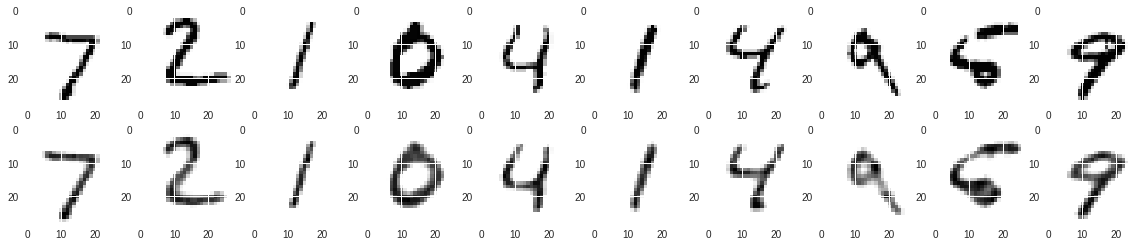

In [11]:
num_test_images = 10

with tf.Session() as sess:

  saver.restore(sess, saver_path + "cae.ckpt")

  results = decoded.eval(feed_dict={X:mnist.test.images[:num_test_images]})

# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
  a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
  a[1][i].imshow(np.reshape(results[i], (28, 28)))

# References:
- [Introduction to Autoencoders
](https://www.doc.ic.ac.uk/~js4416/163/website/autoencoders/#XG.E.Hinton2006)
- [Autoencoders — Introduction and Implementation in TF.](https://towardsdatascience.com/autoencoders-introduction-and-implementation-3f40483b0a85)
- [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)